<a href="https://www.kaggle.com/code/viniciusnalasantos/k-means-clustering?scriptVersionId=125191526" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Clustering: Extracting Patterns From Data & Concept + Feature Scaling + PCA [Pt.1]
### Customers segmentation based on their credit card usage behavior

![credit_cards.png](https://miro.medium.com/v2/resize:fit:828/0*S9zDFD_KE5yEiiaY)

This is the first article of a series in which I will outline an end-to-end clustering project. We will begin with some initial concepts, going to dataset exploratory analysis, passing through data preprocessing, grouping customers into clusters, and at the end, we will perform an analysis of the clusters, plus marketing suggestions.

 It's lots of things to do, so let's start!

 ### Table of Contents

[Part One](#part_one)
* [Clustering Definition](#clustering_definition)
* [Supervisionized Learning x Unsupervisionized Learning](#supervised_unsupervised)
* [K-Means Clustering](#concept)
* [Dataset Dictionary](#data_dictionary)
* [Project Aim](#project_aim)
* [EDA (Exploratory Data Analysis)](#eda)
* [Feature Scaling](#feature_scaling)
* [PCA (Principal Component Analysis)](#pca)
* [Cluster Visualization with Plotly](#visualization)
* [Conclusion](#conclu)

[Part Two](#part_two)
* [Introduction](#Introduction)
* [Metrics](#metrics)
     - [Silhouette](#sil)
     - [Davies Bouldin](#db)
     - [Calinski Harabasz](#ch)
* [Find the Ideal K Number of Clusters](#ideal_k)
     - [Elbow Method](#elbow)
     - [Alternative Methods](#alternative)
* [Cluster Significance](#significance)
* [Conclusion](#conclusion)

[Part Three](#part_three)
* [Coming soon...]()

<a id="part_one"></a>
<h2><b> Part One </b></h2>

---

#### Code from the article: [Clustering: Extracting Patterns From Data & Concept + Feature Scaling + PCA [Pt.1]](https://medium.com/@viniciusnala/clustering-extracting-patterns-from-data-concept-feature-scaling-pca-pt-1-4f33c6d39a71)

<a id="clustering_definition"></a>
## Clustering Definition

Clustering or data grouping analysis is a set of data mining techniques that aims to make an automatic grouping of the data according to their degree of similarity. The criterion of similarity depends on the problem and algorithm. The result of this process is the division of a data set into a certain amount of groups (clusters).

This is a very important definition, and all that we will do after that is related somewhat to this definition. Another very important definition is the difference between the two concepts below.

<a id="supervised_unsupervised"></a>
## Supervised Learning x Unsupervised Learning

Supervised Learning is an approach where an algorithm is trained on input data that has been labeled for a particular output. The model fits the data capturing the underlying pattern and relationship between the input data and the output labels, enabling it to predict outcomes accurately.

The two anterior data science projects that I did:

- [Machine Learning Model to Predict Survival in Titanic [Pt. 1]](https://medium.com/@viniciusnala/machine-learning-model-to-predict-survival-in-titanic-pt-1-b3681d1794fb)
- [Linear Regression: Advanced Modeling Techniques & Pipeline [Pt.1]](https://medium.com/@viniciusnala/linear-regression-advanced-modeling-techniques-pipeline-pt-1-3c0433230b88)

I built a supervised machine learning model, which I used to predict a "target variable" (label).

For example, in the first project, I constructed a model to predict if a person would survive or not on Titanic. To do that I provided data containing general characteristics of each passenger and the information if this person survived or not on Titanic (target variable) - the model captured the underlying pattern and relationship between the general characteristics of the passenger and if he survived or not -, then I presented to it neve-before-seen data with general characteristics of some passengers, but without the information if the passengers survived or not, being the model responsible to guess who would survive or not.

Unlike, supervised learning, unsupervised learning uses unlabeled data, i.e. we don't provide the target variable (label) when training the model. These algorithms aren't used to predict something but to discover hidden patterns in data without the need for human intervention (hence, they are "unsupervised").

If the difference is still not so clear, along the project you will understand better. Let's continue!

<a id="concept"></a>
## K-Means Clustering

The goal of clustering is to identify meaningful groups of data. These groups can be analyzed in depth, or be passed as a feature, or as an outcome to a classification or regression model. K-Means was the first clustering method to be developed, has a very simple algorithm, and is still widely used.

![clustering.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*Cei6GQZkabRgn7J8.png)

K-Means divides the data into a K number of clusters, each cluster has a centroid. The main aim of this algorithm is to minimize the sum of the squared distances of each point to the centroid of its assigned cluster. K-Means does not ensure the clusters will have the same size but finds the clusters that are best separated.

Let's see a simple example, imagine that we have an N number of records and two variables X, and Y. Suppose we wanna split the data into K = 3 clusters, which means assigning each record (Xi, Yi) to a cluster K.

![cluster_1.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*xA_xdOKC9-GA0xcbw77fog.png)

The algorithm first selects random coordinates for the centroids, and using the euclidean distance formula measures the distance between each data point and each cluster centroid. Then each point is assigned to the closest centroid.

![distance.png](https://miro.medium.com/v2/resize:fit:600/format:webp/0*uvyEvT5qpoyv2cFX.png)

![cluster_2.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ozKTU9kb_OgbU-QFA4myLA.png)

After that, the coordinates of the centroids are re-computed by taking the mean of all data points contained in that cluster. Given an assignment of Nk records to cluster K, the center of the cluster(Xk, Yk) is calculated through the equation:

![equation_1.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZCZ97gHVIh2j1FExJzXpow.png)

In simple terms, we are just summing the Xk and Yk of the cluster and dividing by the number of points in that cluster.

After this process, the algorithm computes the sum of squares within each cluster, which is given by the formula:

![equation_2.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Te9NFMLZ9v5ZnIl_Zsp7Tg.png)

The K-Means keep repeating the process of measuring the distance between the points and the centroids, assigning each data point to the closest center, and re-computing the new coordinates of the centroids until the sum of squares across all three clusters is minimized.

![equation_3.png](https://miro.medium.com/v2/resize:fit:640/format:webp/1*odKVjftJNYpoZ9iJhudejA.png)

![cluster_3.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*t_cti7a3DasJ9BT1YpOTmg.png)

Repeat the same process many times can require a great computational cost, especially when the amount of data is large. 

If you wanna see by yourself how it works, I highly recommend this simulator: [K-Means Clustering Simulator](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/).

<a id="data_dictionary"></a>
## Dataset Dictionary

The dataset that will be used consists of the credit card usage behavior of 8950 customers during 6 months, having 18 behavioral features. The link to the dataset is available on Kaggle.

[Credit Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)

- CUST_ID: Identification of Credit Card holder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user
- PRCFULLPAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

<a id="project_aim"></a>
## Project Aim

Initially, our focus will be to segment customers according to their similarities. After that, we will analyze this segmentation and define an effective credit card marketing strategy.

<a id="eda"></a>
## EDA (Exploratory Data Analysis)

Let's begin by importing the libraries and the dataset:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

Visualizing some characteristics of the dataset:

In [ ]:
df.head(10)

In [ ]:
df.shape

Through Pandas Profiling we can see a very detailed report about the general characteristics of the data set.

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(df).to_notebook_iframe()

In [ ]:
# Dowload the report
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("report.html")

After analyzing the report I concluded that the features CUSTOMER_ID and TENURE are not going to contribute with the segmentation so we can exclude them from the dataset.

In [3]:
# Delete the irrelevant features
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

Now our dataset has 16 columns.

Let's see how many missing values there are in the dataset.

In [ ]:
# See Null Values
df.isnull().sum().sort_values(ascending=False)

Just a few ones, to deal with them I will use KNNImputer: each missing value will be imputed using the mean value from the n_neighbors nearest neighbors, in this case, will be the mean value of the 5 nearest neighbors.

In [4]:
from sklearn.impute import KNNImputer

# Columns with missing values
null_columns = df.columns[df.isnull().any()].tolist()

# Fill Null values
imputer = KNNImputer(n_neighbors=5)
df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
df = df.fillna(df_imp)

This way, instead of filling all the values with the mean or the median, which is considered a simple approach, we reduce the risk of biasing the clustering results.

In [ ]:
# Distribution Visualization
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    plt.xlabel(col)
        
plt.show()

Almost every variable is very right-skewed or very left-skewed, this indicates that maybe there are some outliers, which is not something very surprising since we are working with credit card. Certainly, there will be a small portion of people that have a very high amount of money and credit limit, while the majority portion of people has more or less the same amount of money and credit limit.

<a id="feature_scaling"></a>
## Feature Scaling

(photo)

If you see the frequency columns like BALANCE_FREQUENCY, and PURCHASES_FREQUENCY, they vary between an interval of 0 and 1, 0 means 0% of frequency and 1 means 100% frequency. Comparing them with the columns BALANCE and PURCHASES, you will see that they don't have a limit to their variation, we only know that their minimum can be 0.

However, if you put these columns in the way they're right now in the cluster, it will not yield a high-quality cluster because the cluster will understand that 1.00 dollar difference in BALANCE is as significant as 1.00 percent difference in BALANCE_FREQUENCY.
 
In virtue of that, we need to put all the columns into the same scale, otherwise, will be the same thing as clustering people on their weights in kilograms and heights in meters, is a 1kg difference as significant as a 1m difference in height?
 
This is why scaling the dataset is a vital part when using clustering techniques. Therefore, we will use Normalizer to scale the dataset, but there are many ways to scale a dataset, and each one is used for a specific situation.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import Normalizer

scaler = Normalizer(norm='l2')

Normalizer, unlike the other methods, works on the rows, not the columns. This seems very unintuitive, but it means that will scale each value according to its line, and not according to the values in its column.

By default, L2 normalization is applied to each observation so the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would equal 1. Moreover, Normalizer transforms all the features into values between -1 and 1.

<a id="pca"></a>
## PCA (Principal Component Analysis)

In [ ]:
# Reduce dimensions
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1234)

PCA is a method used in unsupervised machine learning (such as clustering) that reduces high-dimension data to smaller dimensions while preserving as much information as possible. Using PCA before applying clustering algorithm reduces dimensions, data noise, and decreases computation cost.

In this article, the number of features will be reduced to 2 dimensions so that the clustering results can be visualized.


                                                                        ...
To organize better these two preprocessing steps we will embed them into a unique step with Pipeline:

In [ ]:
# Preprocessing
from sklearn.pipeline import Pipeline

# Pipeline
pipe_normalizedscaled_pca = Pipeline([('scaling', scaler), ('pca', pca)])

The dataset will be in this way after the preprocessing:

In [ ]:
# Transformed dataset
pd.DataFrame(
    pipe_normalizedscaled_pca.fit_transform(df),
    columns=['x', 'y']
)

<a id="visualization"></a>
## Cluster Visualization with Plotly

Once done the preprocessing, the only thing that remains is the modeling and visualization. And to do this I will create a function, so we can use it whenever we want.

In [6]:
# Libs
from sklearn.cluster import KMeans
import plotly.express as px
import seaborn as sns

# Function
def Visualize_Cluster(df, pipeline, n_clusters):
    '''
    Display a scatter plot cluster after transforming the data and using it to fit KMeans Cluster 
    
        Parameters:
                df (pandas.core.frame.DataFrame): Dataframe that will be used in the Pipeline and train the KMeans Cluster
                pipeline (sklearn.pipeline.Pipeline): Transform the Dataframe
                n_clusters (int): Number of clusters that the KMeans Cluster will have
        
        Returns:
                None    
    '''
    
    data = pd.DataFrame(pipeline.fit_transform(df), columns=['x', 'y'])
    
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300, verbose=False, random_state=1234)
    clusters = pd.DataFrame(kmeans.fit_predict(data), columns=['Cluster']) 
    
    clusters_data = pd.concat([data, clusters], axis=1)
    
    fig = px.scatter(clusters_data, x='x', y='y', color='Cluster')
    fig.show()

First, we import the KMeans library for the clustering and the Plotly library for the cluster visualization. Then we write the function that has as parameters: the dataset for training the KMeans model, the pipeline for preprocessing, and the number of clusters in KMeans.

Internally, the function will transform the dataset according to the steps in the Pipeline, assuming that this transformation will only return two columns, which will be named "x", and "y". Create the KMeans Cluster, and inside this object, it will be passed the number of clusters previously specified in the parameters of the function as an argument, so we can visualize how many clusters we want. And in the end, we will plot the scatter graph of the clustering, each color will be a cluster.

Now, let's visualize our clustering with 5 clusters.

In [ ]:
Visualize_Cluster(df, pipe_normalizedscaled_pca, n_clusters=5)

Remember: almost all attributes of the KMeans model in the function are with the default values, the only attribute that we can change is the number of clusters of the clustering. Therefore, we can make the clustering even better by changing the parameters of the KMeans model.

Let's see how would be our clustering with 10 clusters.

In [ ]:
Visualize_Cluster(df, pipe_normalizedscaled_pca, n_clusters=10)

<a id="conclu"></a>
## Conclusion

In this first part, we started the project learning some concepts and understanding how clustering works. In part two of the series, we will give continuity to the project by learning the most common metrics used to validate a cluster and how to use these metrics to find the ideal number of clusters for this dataset.

In virtue of the content being about metrics, we will have to enter into math equations, so I will explain many things in mathematical terms (what people usually dislike, but the subject being studied requires that be this way), and I will assume that you have at least a basic algebra knowledge.

<a id="part_two"></a>
<h2><b> Part Two </b></h2>

---

#### Code from the article: [Clustering: Extracting Patterns From Data & Metrics + Cluster Validation [Pt.2]](https://medium.com/@viniciusnala/clustering-extracting-patterns-from-data-metrics-cluster-validation-pt-2-dd2ce0a3405d)

# Clustering: Extracting Patterns From Data & Metrics + Cluster Validation [Pt.2]
### Customers segmentation based on their credit card usage behavior

![metric.png](https://cdn-images-1.medium.com/max/1100/0*56TuU0xuAgVwrqOB.png)

In part one, we learned some concepts and understood what we are going to do in the project. In part two, as I said, we will start discussing about metrics and cluster validation.

<a id="introduction"></a>
## Introduction

Before continuing the project, we need to know how to answer questions like: does the cluster represent well the dataset? Which is the ideal K number of clusters? How to know if the data is valid to be clustered? Without knowing how to answer these questions, every work will be in vain.

In virtue of that, some metrics are used to evaluate a clustering algorithm, through these metrics we can measure the similarity inside a cluster and its separation from the other clusters. Learning how to analyze these metrics is the key aim of this article.

<a id="metrics"></a>
## Metrics

<a id="sil"></a>
### Silhouette

![sil.png](https://cdn-images-1.medium.com/max/1100/0*NypMcCBaiqkvfjD3.png)

The first metric that I wanna show is the most commonly used, and it's very simple to interpret it. The silhouette value measures how similar an object is to its cluster (compression) compared to other clusters (separation). To understand this equation, I will define what each variable means.

First, I would like to explain **A**, which is the mean distance between the point and all the other points of the same cluster; measures the compression of the clusters; the smaller the value, the more compressed the clusters.

![sil2.png](https://cdn-images-1.medium.com/max/1100/0*3WaD3IJDPLsmD6xf)

Let i be a data point in the cluster **CI**; **CI** be the number of points belonging to cluster **i**; and **d(i,j)** be the distance between the points **i** and **j** in the cluster **CI**. First, we sum the distance of the points and all the other points of the same cluster, then we divide by the number of data points in that cluster (we write **CI - 1** because we do not include the distance **d(i,i)** in the sum).

Now, I will explain **B**, which is the mean distance between the point and all the other points of the closest cluster; measures the separation of the clusters; the bigger the value, the more separated the clusters.

![sil.png](https://cdn-images-1.medium.com/max/1100/0*JPgpv39P2lFz758j)

Let **CJ** be the nearest neighbor of the point **i** in cluster **CI** (hence the min operator in the formula). First, we sum the distance of the points and all the other points of the closest cluster, then we divide by the number of data points in that cluster.

We now can define a silhouette value of one datapoint **i**:

![sil.png](https://cdn-images-1.medium.com/max/1100/0*U2r0LdfvnCHllm-T)

The silhouette ranges from −1 to +1, where 1 means the clusters are well apart from each other and clearly distinguished; 0 means the clusters are indifferent, or we can say that the distance between clusters is not significant; -1 generally indicates that there are data points of a cluster inside a different cluster, it's the worst result that we can have.

The logic behind the **max(a, b)** is that if the clusters are well apart of each other and clearly distinguished, the a will be very small and b will be bigger, which means that **b-a** will return a number close to **b**, and **b** will be selected to divide in **max(a, b)**. Therefore dividing a number close to **b** by **b**, will result in a number close to 1.

<a id="db"></a>
### Davies Bouldin

![db.png](https://cdn-images-1.medium.com/max/1100/1*_njPDY_X1qcyJhIzvpWrIA.png)

To understand the Davies Bouldin metric, we need first to understand what **Ri,j** means, which is given by the equation:

![db.png](https://cdn-images-1.medium.com/max/1100/0*_wXs9tiTUVe5SyiO)

Where the **Si** is the mean distance between every point in cluster **Ci** to the centroid of cluster **Ci**, it measures the compression of the clusters, so we wanna this variable to be near 0.

**Di,j** is the distance between the centroids of the clusters **Ci** and **Cj**, it measures the separation of the clusters, so we wanna this variable as large as possible.

Remember that **i** need to be different from **j**, otherwise, if they are equal, the distance **Di,j** will be 0. The equation above gives the similarity between the cluster **Ci** and **Cj**, being minimized as the clusters are more distant and more compacted, that is, the closer to 0 the **Ri,j**, the more similar the clusters are.

The final equation for Davies Bouldin is given by the equation:

![db.png](https://cdn-images-1.medium.com/max/1100/0*dM1ocPwuDW6ZLXQD)

Where **K** is the number of clusters of the clustering.

The logic behind the **max(Ri,j)** is that: suppose we did a K-Means clustering with 5 clusters, and we calculated the **Ri,j** between all the 5 clusters and stored all the 10 values in a list (10 because we calculated the **Ri,j** of cluster 1 and 2, 1 and 3, 1 and 4, 1 and 5, 2 and 3… for all the clusters). Once our objective is for the **Ri,j** of the clusters to be as close to 0 as possible, we will only select the **Ri,j** of clusters 1, 2, 3, 4, and 5 that are the biggest, because if the mean of the worst results is considerably good, we can suppose that the clustering, in general, is very good.
 
Therefore, we wanna the **DB** as close to 0 as possible.

<a id="ch"></a>
### Calinski Harabasz

![ch.png](https://cdn-images-1.medium.com/max/1100/0*XMPOy2qlfkWNo4hE)

Only by looking at this equation, I can already imagine people thinking of skipping this metric, however, this metric is very simple to be comprehended, we just need to go by parts.

![ch.png](https://cdn-images-1.medium.com/max/1100/1*BY-MFR45eI6xD71SnHQ3Nw.png)

Let's start with the right part of the equation. **N** is the number of elements of each cluster multiplied by the number of clusters and **K** is the number of clusters.

Now we can go to the **SSw**:

![ch.png](https://cdn-images-1.medium.com/max/1100/0*bgLHieo7NY882JJB)

Which refers to the *overall within-cluster variance*, and is given by the sum of the squared distances of each data point **X** to the centroid of the cluster **Mi** to which it belongs. Measures the dispersion within cluster, so we wanna this value to be as close to 0 as possible.

![ch.png](https://cdn-images-1.medium.com/max/1100/0*J5DQASo2DUpfLkoN)

Another required calculation is the *overall between-cluster variance*, which is given by the difference between the sum of the squared distances of each data point **X** to the data set centroid and the **SSw**. To find the data set centroid, or data set center, we have to take the X and Y coordinates of all the data points and divide them by the number of data points. The **SSb** measures the dispersion between clusters, so we wanna this value as large as possible.

Ultimately, this is the equation for the Calinski-Harabasz value:

![ch.png](https://cdn-images-1.medium.com/max/1100/0*5w4AeumFZUvc7Jed)

Once **N** and **K** are constants, if **SSb** is bigger and **SSw** smaller, which is the objective, the result will be large. Unlike the other metrics, the higher the value, the better the clustering, very small values mean not high-quality clusters according to this metric.

Now that we learned about the three most common metrics, let's see how we apply them in practice.

<a id="ideal_k"></a>
## Find the Ideal K Number of Clusters

A K-Means algorithm requires that you specify the K number of clusters. Sometimes the number of clusters can be intuitive, or driven by the application. For instance, a company might want to cluster its customers according to "personas", so in this case, managerial considerations would dictate the number of desired customer segments. Two maybe not yield a good differentiation of the customers, while nine might be too many to manage.

In absence of a K number of clusters, a statistical approach could be used. There are many methods to find the ideal number, a common approach is called *elbow method*.


<a id="elbow"></a>
### Elbow Method

![elbow.png](https://cdn-images-1.medium.com/max/1100/0*O_gfqwexREu7ntfY.jpeg)

The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

When I say explained variation I am referring to the WCSS (Within-Cluster Sum of Square), which can be calculated with the sum of the square distances between points in a cluster and the cluster centroid. We can get this information from the property *inertia_*.
 
Let's see this graph of our dataset, from the range of 2 to 30 K number of clusters:

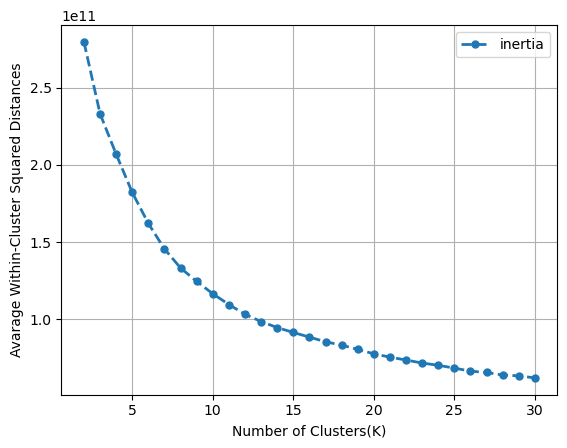

In [7]:
inertia = []

# Append the WCSS values for 2 to 30 K number of clusters
for n_clusters in range(2,31):
    kmean = KMeans(n_clusters=n_clusters, random_state=1234).fit(df)
    inertia.append(kmean.inertia_)

inertias = pd.DataFrame({'n_clusters': range(2,31), 'inertia': inertia})


# Graph
ax = inertias.plot('n_clusters', 'inertia', marker='o', linestyle='--', linewidth=2, markersize=5)

plt.xlabel('Number of Clusters(K)')
plt.ylabel('Avarage Within-Cluster Squared Distances')
plt.grid()

plt.show()

As the majority of the real-world datasets don't have a clear elbow point, we have to rely on other methods for our analysis. However, not having a well-defined elbow point, does reveal the nature of the data of not having well-defined clusters.

We can even use libraries that automatically select the optimal elbow point for you, although the point is not so clear:

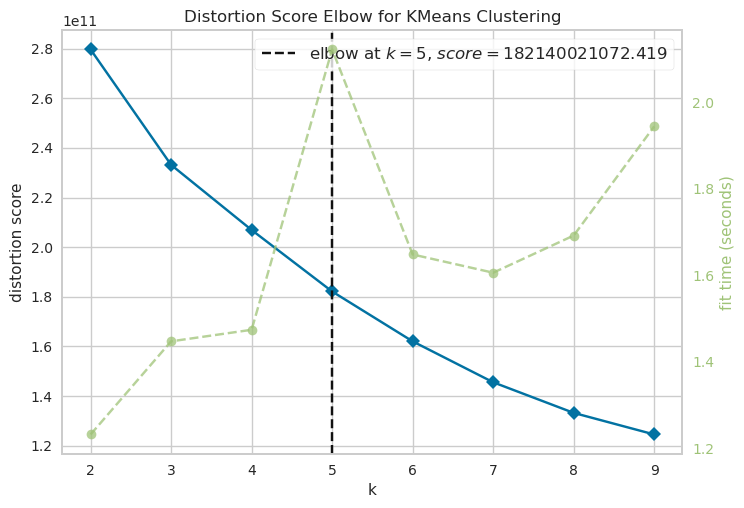

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(random_state=1234)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

According to the library, the "best" K number is 5.

<a id="alternative"></a>
### Alternative Methods

As we learned the metrics earlier, we can use them to identify the ideal K number of clusters. To do that I will first generate the values of the silhouette, davies bouldin, and calinski harabasz for 2 to 30 K number of clusters.

In [8]:
# Libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Pipeline
pipe_normalizer = Pipeline([('normalization', Normalizer())])

# Transformed data
data = pipe_normalizer.fit_transform(df)
data = pd.DataFrame(data, columns=df.columns)

# Function
def return_metrics(n_clusters, dataset):
    """
    Return the silhouette, davies bouldin, and calinski harabasz scores
    
        Paremeters:
            n_clusters (int): number of clusters of KMeans
            dataset (pandas.core.frame.DataFrame): dataframe of the clustering
        
        Returns:
            si (float): silhouette score
            db (float): davies bouldin score
            ch (float): calinski harabasz score
    """
    kmean = KMeans(n_clusters=n_clusters, random_state=1234)
    labels = kmean.fit_predict(dataset)
    
    si = silhouette_score(dataset, labels, metric='euclidean', random_state=1234)
    db = davies_bouldin_score(dataset, labels)
    ch = calinski_harabasz_score(dataset, labels)
    
    return si, db, ch


n_clusters, si_list, db_list, ch_list = list(), list(), list(), list()

# Calculate and store the metrics for 2 to 30 K number of clusters
for i in range(2, 31):
    si, db, ch = return_metrics(i, data)
    n_clusters.append(int(i))
    si_list.append(si)
    db_list.append(db)
    ch_list.append(ch)

# Metrics Values
metrics = pd.DataFrame(np.column_stack((n_clusters, si_list, db_list, ch_list)), columns=['N° Clusters', 'silhouette', 'davies_bouldin', 'calinski_harabasz'])
metrics.head()

,N° Clusters,silhouette,davies_bouldin,calinski_harabasz
0,2.0,0.295724,1.532848,3254.497248
1,3.0,0.322654,1.319109,3425.502850
2,4.0,0.344118,1.234409,3421.649123
3,5.0,0.354871,1.104302,3420.187025
4,6.0,0.363506,1.043397,3514.998508


First of all, I will analyze the Silhouette score:

In [9]:
# Lib
import plotly.express as px

# Silhouette
fig = px.line(metrics, x='N° Clusters', y='silhouette', title='Silhouette')
fig.show()

The objective of the Silhouette score is to be as close to 1 as possible, and the closer ones are between 5 and 6. But I'm still in doubt about what number should I choose so I will do another plot of the silhouette for 4 to 7 K number of clusters.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



,N° Clusters,silhouette
0,4.0,0.344118
1,5.0,0.354871
2,6.0,0.363506
3,7.0,0.322571


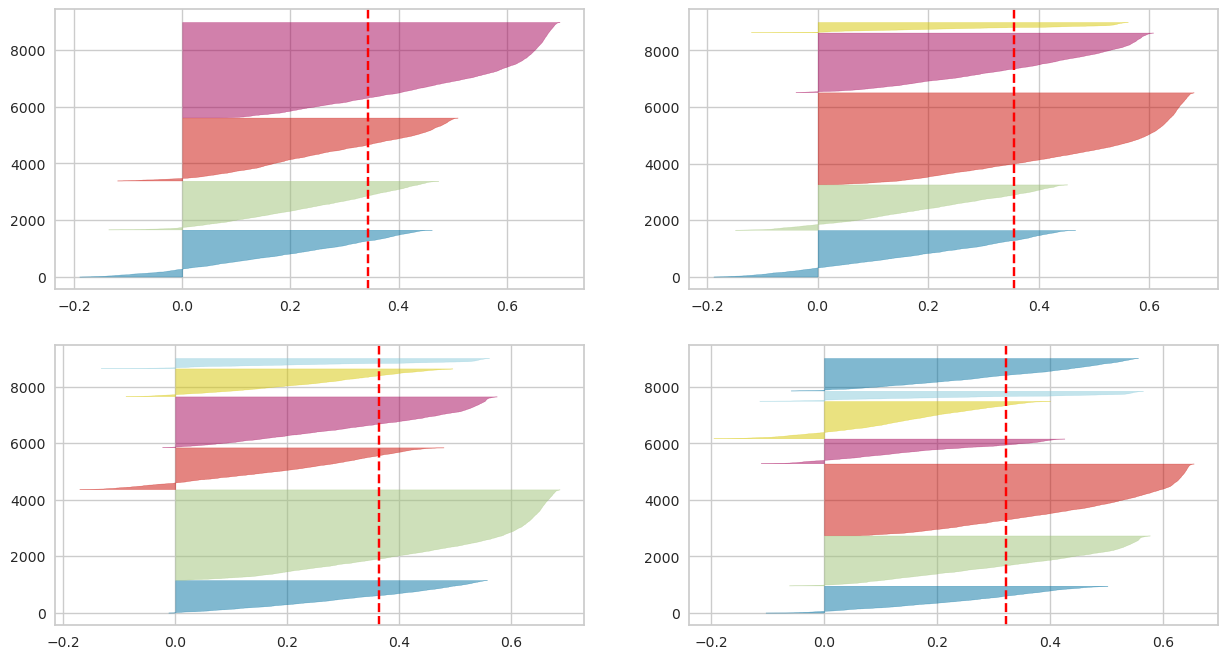

In [11]:
# Lib
from yellowbrick.cluster import SilhouetteVisualizer

# Fig
fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [4, 5, 6 ,7]:
    
    km = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=1234)
    q, mod = divmod(i, 4)
    
    if mod>1:
        q += 1
        mod -= 2
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data)


# Average Silhouette Score 
metrics[metrics['N° Clusters'].between(4, 7, inclusive=True)][['N° Clusters', 'silhouette']].reset_index(drop=True)

Each color in each graph represents a cluster, the size of the color represents the size of the cluster, and the dashed red line represents the average Silhouette score for the specified K number of clusters.

For an ideal K, all the clusters should have a Silhouette score bigger than the average Silhouette score, and for 4 to 7 K clusters, this condition is satisfied. Another thing that should be taken into consideration is the fluctuation in the size of the clusters, where I can see that clusters with 5 to 7 K clusters fluctuate more.

Before deciding on the K number, let's see what the other metrics can tell us.

In [12]:
# Davies Bouldin
fig = px.line(metrics, x='N° Clusters', y='davies_bouldin', title='Davies Bouldin')
fig.show()

According to Davies Bouldin metric, where the objective is to be as close as possible to 0, again the K numbers 5 and 6 seem to be the best ones.

In [13]:
# Calinski Harabasz
fig = px.line(metrics, x='N° Clusters', y='calinski_harabasz', title='Calinski Harabasz')
fig.show()

And according to Calinski Harabasz metric, where the objective is to be as large as possible, is the same.

After this analysis, I decided to choose 5 as the K number of clusters to be used in our clustering.

<a id="significance"></a>
## Cluster Significance

Now that we already decided how many clusters we want in the clustering, let's see if the clusters are valid. One way of doing it, is generating a random dataset with the same size as the credit card dataset, and then comparing the values of the metrics of this dataset to the credit card dataset.

In [14]:
# Generating the random dataset
dataset = np.random.rand(8950, 16)

# Computing the metrics for the random dataset
si, db, ch = return_metrics(5, dataset)


# Display the results
print('Metrics of the cluster with the credit card dataset:')
display(metrics[metrics['N° Clusters'] == 5].reset_index(drop=True))

print('\n')

print('Metrics of the cluster with a random dataset:')
display(pd.DataFrame(data=[[5, si, db, ch]], columns=['N° Clusters', 'silhouette', 'davies_bouldin', 'calinsk_harabasz']))

Metrics of the cluster with the credit card dataset:


,N° Clusters,silhouette,davies_bouldin,calinski_harabasz
0,5.0,0.354871,1.104302,3420.187025




Metrics of the cluster with a random dataset:


,N° Clusters,silhouette,davies_bouldin,calinsk_harabasz
0,5,0.039657,3.515836,303.274679


First I generated a random dataset with the same shape as the credit card dataset, then I computed the values of the silhouette, davies bouldin, and calinski harabasz for this dataset using the function return_metrics that we created earlier.

Comparing both datasets, we see that the credit card dataset achieved a better score in all the metrics. This way, we can know if our data is significant to be clustered or not.

<a id="conclusion"></a>
## Conclusion

In the second part, we learned three standard metrics for clustering evaluation, and understood how to find the ideal K number of clusters when the Elbow Method doesn't provide a clear answer.

In the next part, we will begin by doing the analysis of the clustering, identifying the peculiarities of each cluster, and defining effective marketing suggestions. Unlike part two, the next part won't have many math equations, however, we will have to do a lot of descriptive measures interpretation and graph visualization analysis.

<a id="part_three"></a>
<h2><b> Part Three </b></h2>

---

#### Coming soon...

In [11]:
from sklearn.cluster import KMeans

#data = pd.DataFrame(pipe_normalizer.fit_transform(df), columns=df.columns)
    
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, verbose=False, random_state=1234)
labels = pd.DataFrame(kmeans.fit_predict(data), columns=['CLUSTER']) 
    
clusters_data = pd.concat([df, labels], axis=1)
clusters_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,3720.379789,0.000000,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,2


In [14]:
clusters_data['CLUSTER'].value_counts()

2    3241
3    2102
0    1644
1    1600
4     363
Name: CLUSTER, dtype: int64

In [15]:
fig = px.scatter(clusters_data, x='PURCHASES', y='PAYMENTS', color='CLUSTER')
fig.show()

NameError: name 'px' is not defined

In [ ]:
fig = px.scatter(clusters_data, x='PURCHASES', y='CASH_ADVANCE', color='CLUSTER')
fig.show()

In [ ]:
sns.pairplot(clusters_data, hue='CLUSTER', palette='bright')

In [ ]:
clusters_data.groupby(by='CLUSTER').describe()

In [12]:
centroids = kmeans.cluster_centers_
centroids

array([[1.59548639e-01, 2.43949994e-04, 4.17932568e-01, 2.43594434e-01,
        1.74496296e-01, 3.40770502e-02, 1.97932757e-04, 8.60936021e-05,
        1.45348180e-04, 1.12340363e-05, 2.14345253e-04, 5.93357135e-03,
        5.88615917e-01, 4.36169177e-01, 9.25661094e-02, 7.02812712e-05],
       [2.91488891e-01, 2.27288520e-04, 4.45971861e-02, 2.43327469e-02,
        2.02675061e-02, 4.94958116e-01, 4.74928886e-05, 1.63920827e-05,
        3.18695459e-05, 7.77468299e-05, 1.81872632e-03, 8.62258651e-04,
        6.02130404e-01, 3.84210816e-01, 1.17999934e-01, 1.65268252e-05],
       [6.86246386e-02, 2.30383633e-04, 1.22651109e-01, 4.90885709e-02,
        7.36653985e-02, 2.37726803e-02, 1.70681096e-04, 3.40251438e-05,
        1.38117840e-04, 7.83441260e-06, 1.23851559e-04, 2.86720718e-03,
        9.43170767e-01, 1.55164486e-01, 5.74965420e-02, 7.69938563e-05],
       [5.47726311e-01, 2.86009353e-04, 7.72543430e-02, 4.37306965e-02,
        3.35585430e-02, 1.40328747e-01, 8.08157687e-05, 3.047

In [13]:
for i in range(centroids.shape[1]):
    print(f'{clusters_data.columns[i]}:', '{:.4f}'.format(centroids[:, i].var()))

BALANCE: 0.0261
BALANCE_FREQUENCY: 0.0000
PURCHASES: 0.0179
ONEOFF_PURCHASES: 0.0070
INSTALLMENTS_PURCHASES: 0.0030
CASH_ADVANCE: 0.0315
PURCHASES_FREQUENCY: 0.0000
ONEOFF_PURCHASES_FREQUENCY: 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY: 0.0000
CASH_ADVANCE_FREQUENCY: 0.0000
CASH_ADVANCE_TRX: 0.0000
PURCHASES_TRX: 0.0000
CREDIT_LIMIT: 0.0364
PAYMENTS: 0.0131
MINIMUM_PAYMENTS: 0.0680
PRC_FULL_PAYMENT: 0.0000


In [ ]:
centroids_list = list()

for i in range(centroids.shape[1]):
    centroids_list.append(centroids[:, i].var())


centroids_var = pd.DataFrame(centroids_list, index=clusters_data.columns[:-1], columns=['Variance of the Centroids'])
centroids_var

In [ ]:
significant_centroids_var = centroids_var[centroids_var['Variance of the Centroids'] > 0.009]
significant_centroids_var

In [ ]:
from scipy import stats

stats.probplot(clusters_data['BALANCE'], plot=plt)
plt.show()

The dataset is a usage of account during the last 6 months so it means that at the start of these 6 months, lets say the amount in account is VALUE
where: VALUE = PURCHASE + BALANCE
so PURCHASE is the amount of money the account spent
and the BALANCE is the money left in VALUE

In [ ]:
balance = significant_centroids_var.index[0]

clusters_data[[balance, 'CLUSTER']].groupby(by='CLUSTER').describe()

In [ ]:
purchases = significant_centroids_var.index[1]

clusters_data[[purchases, 'CLUSTER']].groupby(by='CLUSTER').describe()

In [ ]:
cash_advance = significant_centroids_var.index[2]

clusters_data[[cash_advance, 'CLUSTER']].groupby(by='CLUSTER').describe()

In [ ]:
credit_limit = significant_centroids_var.index[3]

clusters_data[[credit_limit, 'CLUSTER']].groupby(by='CLUSTER').describe()

In [ ]:
payments = significant_centroids_var.index[4]

clusters_data[[payments, 'CLUSTER']].groupby(by='CLUSTER').describe()

In [ ]:
clusters_data[['PRC_FULL_PAYMENT', 'CLUSTER']].groupby(by='CLUSTER').describe()

In [ ]:
minimum_payments = significant_centroids_var.index[5]

clusters_data[[minimu_payments, 'CLUSTER']].groupby(by='CLUSTER').describe()

In [ ]:
clusters_data['CLUSTER'].value_counts()